In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [4]:
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.models import Sequential
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
#load training dataset as dataframe
file_path1 = '/content/drive/MyDrive/Final year project/datafinal/processed_train.csv'
df = pd.read_csv(file_path1)

In [6]:
X = df.drop(labels='class', axis=1) #splitting the main training data into test and train data so as to get accuracy measures
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=4)

Training time 41.846235036849976


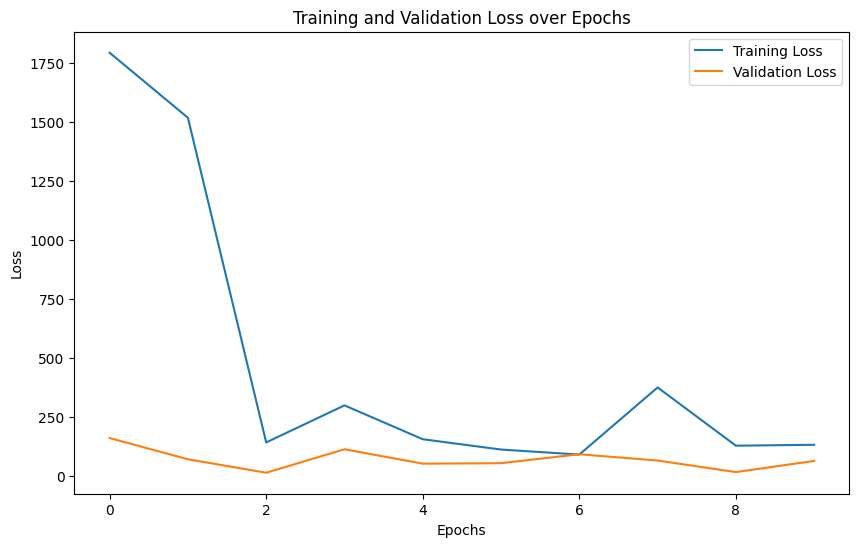

158/158 [==============================] - 0s 2ms/step


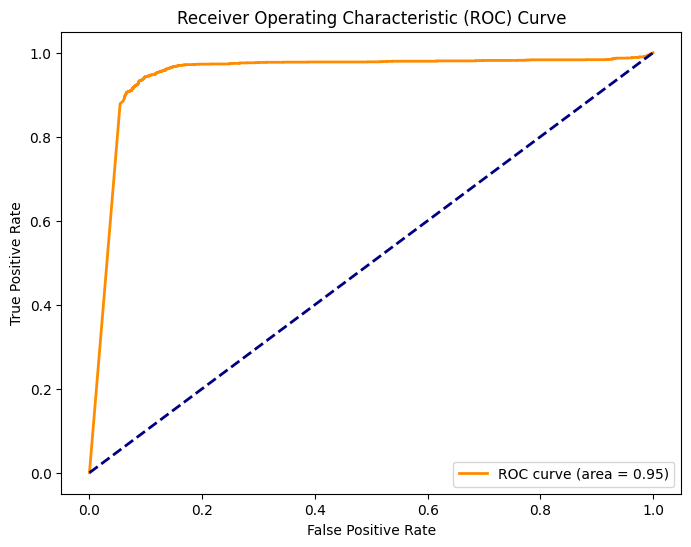


Confusion Matrix:
 [[2009  309]
 [ 115 2606]]


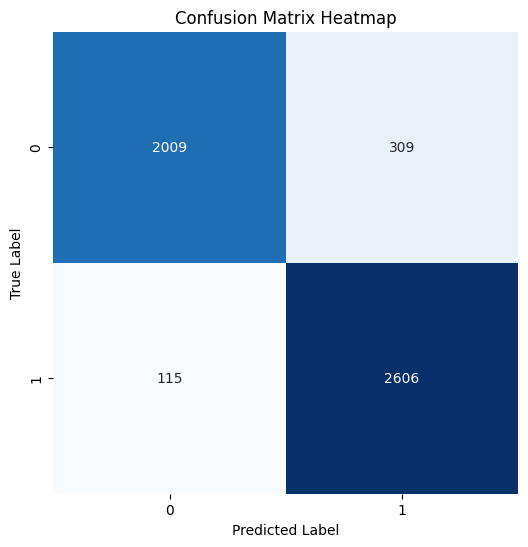

In [7]:
from keras.layers import Dense, LeakyReLU, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import Adagrad
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your training data (X_train, y_train) and testing data (X_test, y_test)

# Build the model
input_shape = (41,)

model4 = Sequential([
    Dense(128, input_shape=input_shape),
    LeakyReLU(alpha=0.3),
    Dense(128),
    LeakyReLU(alpha=0.3),
    Dense(64),
    LeakyReLU(alpha=0.3),
    Dropout(0.25),
    Dense(1),
    Activation('sigmoid')
])

model4.compile(Adagrad(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
import time
s = time.time()
# Train the model
history = model4.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
t = time.time() - s
print("Training time",t)
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred_prob = model4.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_mat)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
model4.save('/content/drive/My Drive/Final year project/models/model4.keras')


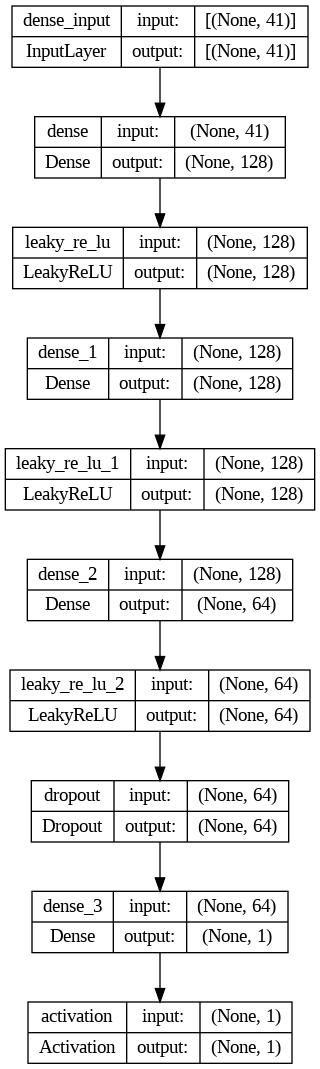

In [ ]:
plot_model(model4, to_file='/content/drive/My Drive/Final year project/models/model architectures/model4.png', show_shapes=True, show_layer_names=True)

In [ ]:
input_shape = (41,)

model5 = Sequential([
    Dense(128, input_shape=input_shape),
    LeakyReLU(alpha=0.3),
    Dense(128),
    LeakyReLU(alpha=0.3),
    Dense(64),
    LeakyReLU(alpha=0.3),
    Dropout(0.25),
    Dense(64),  # Add an additional dense layer
    LeakyReLU(alpha=0.3),  # Use LeakyReLU as the activation
    Dense(32),  # Add another dense layer
    LeakyReLU(alpha=0.3),
    Dropout(0.25),
    Dense(1),
    Activation('sigmoid')
])

model5.compile(Adagrad(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
history5 = model5.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
449/449 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.4954 - val_loss: nan - val_accuracy: 0.4712
Epoch 2/20
449/449 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.4660 - val_loss: nan - val_accuracy: 0.4712
Epoch 3/20
449/449 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.4660 - val_loss: nan - val_accuracy: 0.4712


In [ ]:
model5.save('/content/drive/My Drive/Final year project/models/model5.keras')

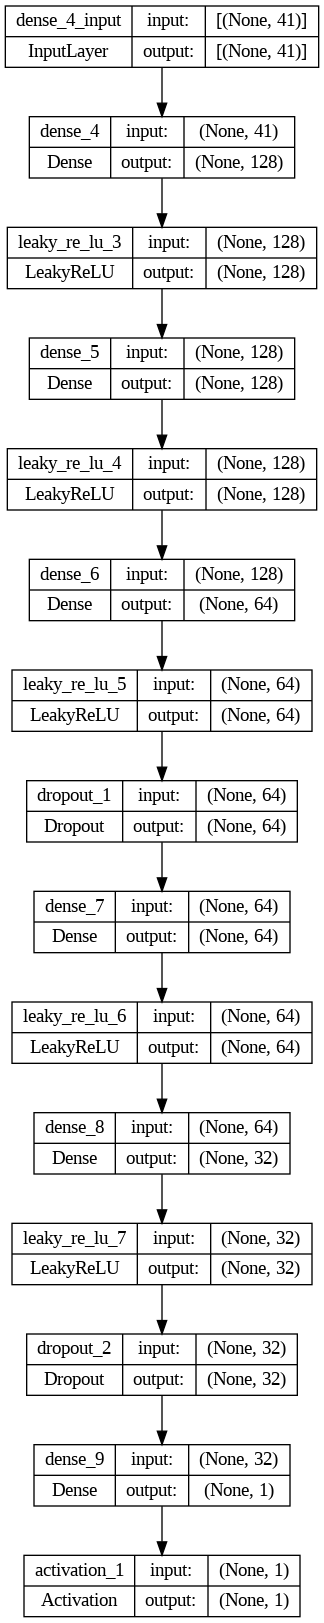

In [ ]:
plot_model(model5, to_file='/content/drive/My Drive/Final year project/models/model architectures/model5.png', show_shapes=True, show_layer_names=True)

In [ ]:
input_shape = (41,)

model6 = Sequential([
    Dense(128, input_shape=input_shape),
    LeakyReLU(alpha=0.3),
    Dense(128),
    LeakyReLU(alpha=0.3),
    Dense(64),
    LeakyReLU(alpha=0.3),
    Dropout(0.25),
    Dense(32),
    LeakyReLU(alpha=0.3),
    Dropout(0.25),
    Dense(1),
    Activation('sigmoid')
])

model6.compile(Adagrad(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history6 = model6.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
449/449 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.5915 - val_loss: nan - val_accuracy: 0.4712
Epoch 2/20
449/449 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.4660 - val_loss: nan - val_accuracy: 0.4712
Epoch 3/20
449/449 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.4660 - val_loss: nan - val_accuracy: 0.4712


In [ ]:
model6.save('/content/drive/My Drive/Final year project/models/model6.keras')

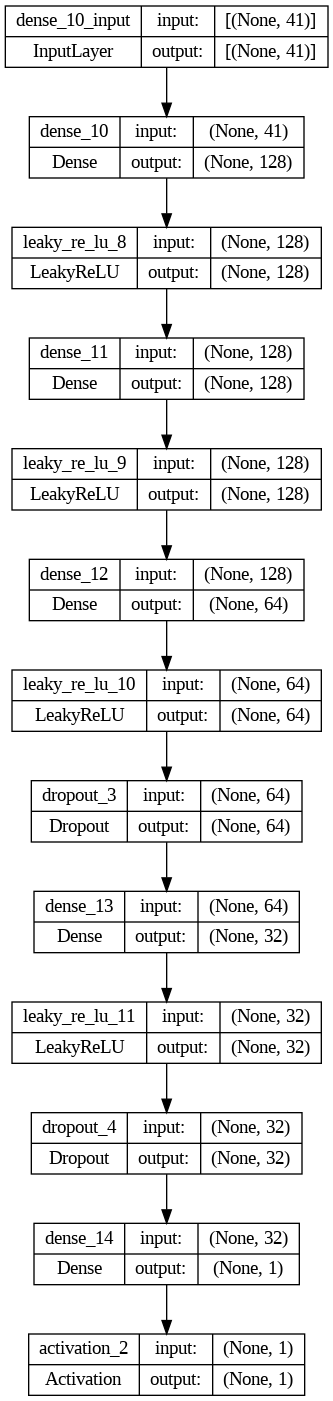

In [ ]:
plot_model(model6, to_file='/content/drive/My Drive/Final year project/models/model architectures/model6.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

input_shape = (41, 1)

model_with_lstm = Sequential([
    LSTM(64, input_shape=input_shape, return_sequences=True),  # LSTM layer
    LSTM(32, return_sequences=True),  # Another LSTM layer
    Dropout(0.25),
    LSTM(16),  # A third LSTM layer
    Dropout(0.25),
    Dense(1, activation='sigmoid')  # Output layer
])

model_with_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history7 = model_with_lstm.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
449/449 [==============================] - 36s 68ms/step - loss: nan - accuracy: 0.7315 - val_loss: nan - val_accuracy: 0.4712
Epoch 2/20
449/449 [==============================] - 35s 77ms/step - loss: nan - accuracy: 0.4660 - val_loss: nan - val_accuracy: 0.4712
Epoch 3/20
449/449 [==============================] - 28s 62ms/step - loss: nan - accuracy: 0.4660 - val_loss: nan - val_accuracy: 0.4712


In [ ]:
model_with_lstm.save('/content/drive/My Drive/Final year project/models/model_with_lstm.keras')

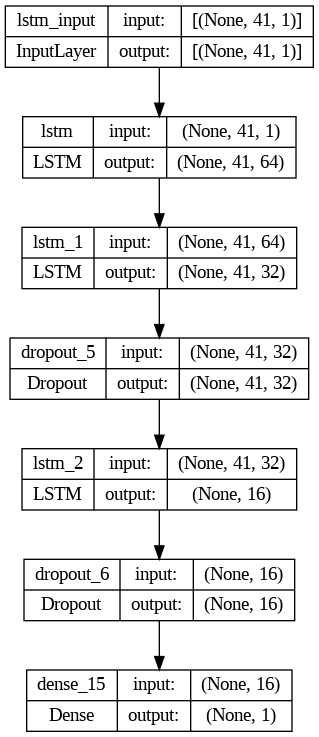

In [ ]:
plot_model(model_with_lstm, to_file='/content/drive/My Drive/Final year project/models/model architectures/model_with_lstm.png', show_shapes=True, show_layer_names=True)

In [ ]:


input_shape = (41, 1)

model_with_lstm2 = Sequential([
    LSTM(64, input_shape=input_shape, return_sequences=True),  # LSTM layer
    LSTM(32, return_sequences=True),  # Another LSTM layer
    Dropout(0.25),
    LSTM(16, return_sequences=True),  # A third LSTM layer
    Dropout(0.25),
    LSTM(8, return_sequences=True),  # Fourth LSTM layer
    LSTM(4),  # Fifth LSTM layer
    Dropout(0.25),
    Dense(1, activation='sigmoid')  # Output layer
])

model_with_lstm2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history8 = model_with_lstm2.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
898/898 [==============================] - 61s 59ms/step - loss: nan - accuracy: 0.8120 - val_loss: nan - val_accuracy: 0.4734
Epoch 2/20
898/898 [==============================] - 49s 55ms/step - loss: nan - accuracy: 0.4685 - val_loss: nan - val_accuracy: 0.4734
Epoch 3/20
898/898 [==============================] - 49s 55ms/step - loss: nan - accuracy: 0.4685 - val_loss: nan - val_accuracy: 0.4734


In [ ]:
model_with_lstm2.save('/content/drive/My Drive/Final year project/models/model_with_lstm2.keras')

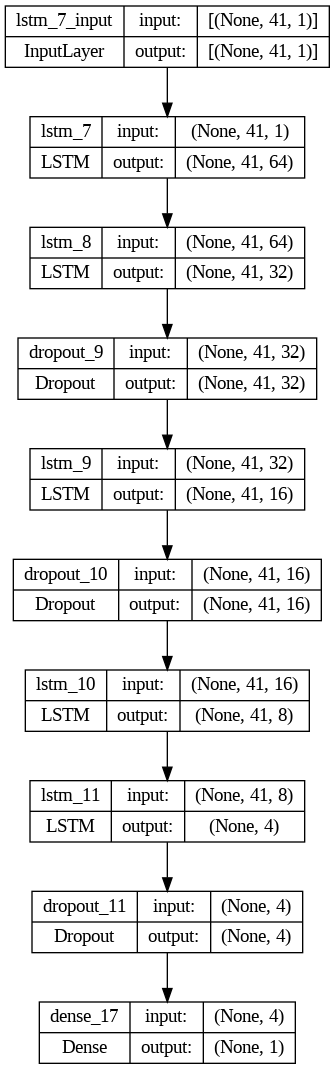

In [ ]:
plot_model(model_with_lstm2, to_file='/content/drive/My Drive/Final year project/models/model architectures/model_with_lstm2.png', show_shapes=True, show_layer_names=True)

In [ ]:


input_shape = (41, 1)

model_with_lstm3 = Sequential([
    LSTM(64, input_shape=input_shape, return_sequences=True),  # LSTM layer
    LSTM(32, return_sequences=True),  # Another LSTM layer
    Dropout(0.25),
    LSTM(8, return_sequences=True),  # Third LSTM layer
    LSTM(4),  # Fourth LSTM layer
    Dropout(0.25),
    Dense(1, activation='sigmoid')  # Output layer
])

model_with_lstm3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history9 = model_with_lstm3.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
449/449 [==============================] - 46s 84ms/step - loss: nan - accuracy: 0.5340 - val_loss: nan - val_accuracy: 0.4712
Epoch 2/20
449/449 [==============================] - 34s 76ms/step - loss: nan - accuracy: 0.4660 - val_loss: nan - val_accuracy: 0.4712
Epoch 3/20
449/449 [==============================] - 36s 80ms/step - loss: nan - accuracy: 0.4660 - val_loss: nan - val_accuracy: 0.4712


In [ ]:
model_with_lstm3.save('/content/drive/My Drive/Final year project/models/model_with_lstm3.keras')

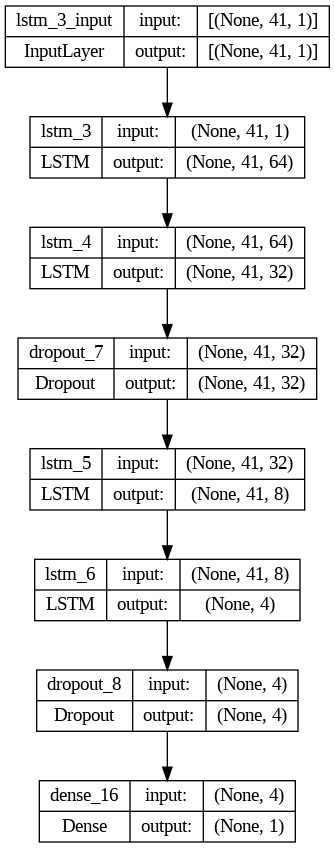

In [ ]:
plot_model(model_with_lstm3, to_file='/content/drive/My Drive/Final year project/models/model architectures/model_with_lstm3.png', show_shapes=True, show_layer_names=True)